In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [17]:
def animate(ydata, fileName, title=""):
    xdata = np.linspace(0,1,len(res[0]))
    fig, ax = plt.subplots()
    line, = ax.plot(xdata, ydata[0], label="time evolution")
    initial_line = ax.plot(xdata, ydata[0], "--", label="initial condition")
    ax.legend(loc="upper right")
    ax.set_ylim([np.min(ydata), 1.1*np.max(ydata)])
    ax.set_title(title)
    global i
    i = 0

    def animate(i):
        line.set_ydata(ydata[i])
        i = i+1
        return line,


    ani = animation.FuncAnimation(fig, animate, frames=len(res))
    ani.save(fileName+".gif", fps=30, writer='imagemagick')

    fig.savefig(fileName+".png")

    return ani

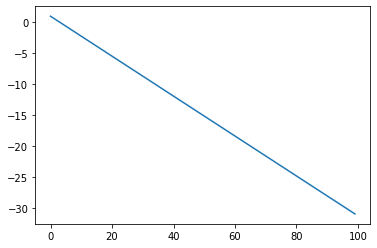

0.09999999999999999


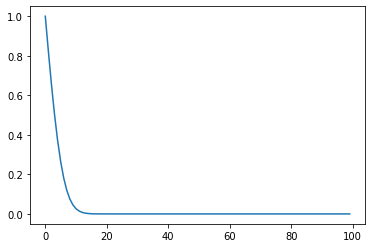

In [3]:
Nx = 100
dt = 10
dx = (1/(Nx+0))
D = 10**(-6)
S = D*dt/(dx*dx)



def apply_boundaries(C):
    C[0] = 1
    C[-1] = C[-2]
    return C

def advance(C):
    new_C = np.empty(len(C))
    for i in range(1, len(C)-1):
        new_C[i] = C[i] + S*(C[i-1] - 2*C[i] + C[i+1])
    apply_boundaries(new_C)
    return np.abs(new_C)

C = np.zeros(Nx)
C = apply_boundaries(C)
res = [C]

for i in range(100):
    C = advance(C)
    res.append(C)

#plt.yscale("log")
print(S)
plt.plot(C)

## Ex 3.2 - Upwind

$$
\frac{\partial C_i}{\partial t} = U \cdot \frac{\partial C_i}{\partial x}
$$

In [4]:
dx = 0.01
Nx = int(1/dx)
x_vals = np.linspace(0,1, Nx)


def gauss(x):
    return np.exp(-10.*np.power(4*x-1,2))

def square(x):
    if hasattr(x, "__len__"): return [square(xi) for xi in x]
    if(0.1 < x) and (x < 0.3): return 1.
    else: return 0.

def advance_upwind(C, Co):
    new_C = np.copy(C)
    for i in range(1, len(C)):
        new_C[i] = (1 - Co) * C[i] + Co * C[i-1]
    return new_C


def simulate_advetion(initFunc, Co, steps):
    x_vals = np.linspace(0,1, Nx)
    C = initFunc(x_vals)

    res = []
    for i in range(steps):
        C = advance_upwind(C, Co)
        res.append(C)

    res = np.array(res)
    return res

## Task 2 - Gauss Pulses

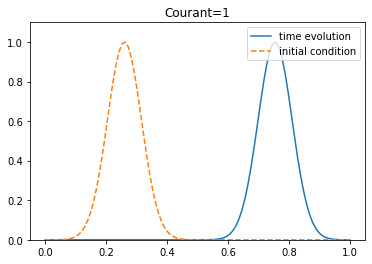

In [5]:
res = simulate_advetion(initFunc=gauss, Co=1, steps=50)
animate(res, "out/task2_gauss_co_1", title="Courant=1")

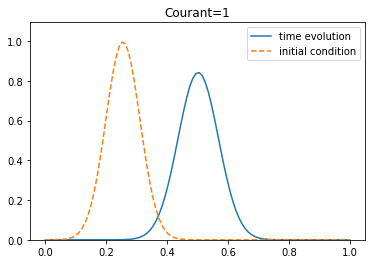

In [6]:
res = simulate_advetion(initFunc=gauss, Co=0.5, steps=50)
animate(res, "out/task2_gauss_co_0.5", title="Courant=1")

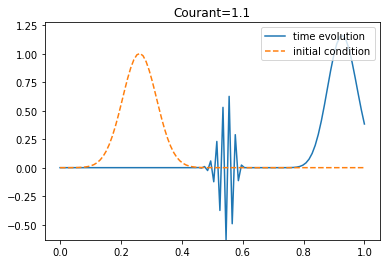

In [7]:
res = simulate_advetion(initFunc=gauss, Co=1.12, steps=60)
animate(res, "out/task2_gauss_co_1.1", title="Courant=1.1")

## Task 2 - Square Pulses

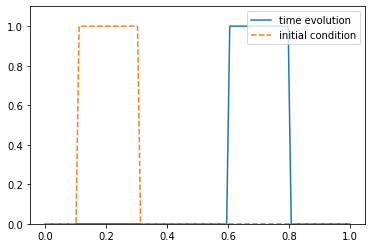

In [8]:
res = simulate_advetion(initFunc=square, Co=1, steps=50)
animate(res, "out/task2_square_co_1")

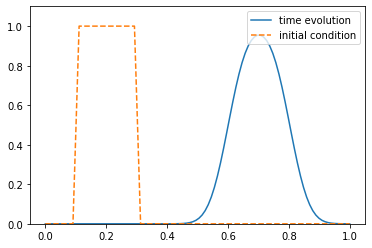

In [9]:
res = simulate_advetion(initFunc=square, Co=0.5, steps=100)
animate(res, "out/task2_square_co_0.5")

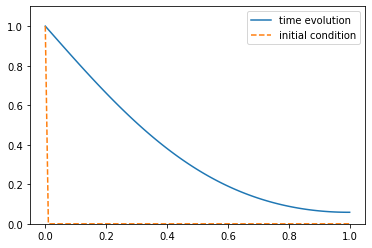

In [12]:
res = np.loadtxt("out/Nx_100_dt_10_numIter_10000_task_2.txt")
animate(res, "out/Nx_100_dt_10_numIter_10000_task_2")

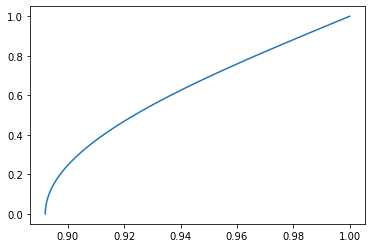

In [68]:
def analytical_sol(x,t, n_max=100):
    #x = np.linspace(0,1,points)
    #n = np.arange(0, n_max+1, 1)
    res = 0
    for n in  np.arange(0, n_max+1, 1):
        res += np.power(-1,n) / ((n+0.5)*np.pi) * np.cos((n+0.5)*np.pi*x) * np.exp( -(n+0.5)*(n+0.5) * np.pi*np.pi*t)
    res = 1+2*res
    return res

distance = np.linspace(0,1,100)
C = [analytical_sol(x, 1, 100) for x in distance)

In [37]:
n = np.arange(0, 10, 1)
np.power(-1,n)

array([ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1])